In [24]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import mahotas as mh
from PIL import Image,ImageOps,ImageFilter
import colorsys
import pivio as piv
import skimage as ski
from skimage import io
import os
import glob

In [40]:
dat1 = [np.zeros((762,500)) for i in range(52)]
dat2 = [np.zeros((762,500)) for i in range(52)]

for counter,f in enumerate(glob.glob('Card/*.png')):
    dat = io.imread(f)
    if 'spa' in f or 'clu' in f:
        dat1[counter] = 1-ski.color.rgb2gray(dat)
    else:
        dat2[counter] = 1-ski.color.rgb2gray(dat)

In [53]:
!rm card.piv
piv1 = piv.pivio('card.piv')
piv1.nt = 52
piv1.nx = 500
piv1.ny = 726
piv1.cols = 3
piv1.vecs = 500*726
piv1.dx = 1
piv1.dy = 1
piv1.x0 = 1
piv1.y0 = 1
piv1.ix = 500
piv1.iy = 726
piv1.write_header()
for i in range(52):
    newd = [np.ones((piv1.ny,piv1.nx)) for i in range(piv1.cols)]
    newd[1] = dat1[i]
    newd[2] = dat2[i]
    piv1.write_frame(newd)

Creating file: card.piv


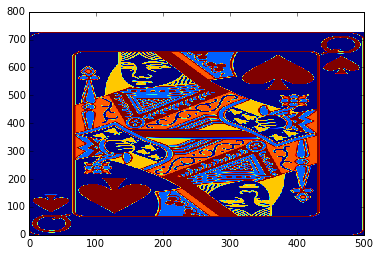

In [55]:
plt.pcolormesh(newd[1])

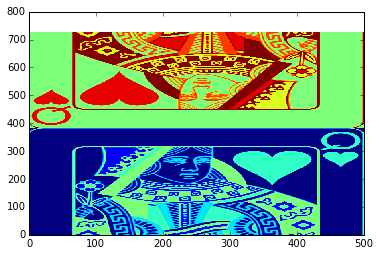

In [54]:
jj = 51
plt.pcolormesh(piv1.read_frame2(jj)[1]+piv1.read_frame2(jj)[2])